In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import platform 

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [3]:
final = pd.read_csv('최종 데이터 프레임.csv', encoding='cp949')
final.head()

,부동산 매매가,1인 소득,사교육비
0,470912.3333,18795,31.2
1,447892.0,19525,32.8
2,445022.5,19832,33.5
3,454295.8333,20857,33.8
4,468677.5,21295,35.2


In [4]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   부동산 매매가  136 non-null    object
 1   1인 소득    136 non-null    object
 2   사교육비     136 non-null    object
dtypes: object(3)
memory usage: 3.3+ KB


In [5]:
final=final.apply(pd.to_numeric, errors='coerce').fillna(0)
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   부동산 매매가  136 non-null    float64
 1   1인 소득    136 non-null    float64
 2   사교육비     136 non-null    float64
dtypes: float64(3)
memory usage: 3.3 KB


In [6]:
final

,부동산 매매가,1인 소득,사교육비
0,470912.3333,18795.0,31.2
1,447892.0000,19525.0,32.8
2,445022.5000,19832.0,33.5
3,454295.8333,20857.0,33.8
4,468677.5000,21295.0,35.2
...,...,...,...
131,164647.9167,16685.0,20.1
132,207546.2500,17366.0,22.6
133,238004.7500,17816.0,22.4
134,274980.1667,18456.0,23.2


In [7]:
%matplotlib inline

<AxesSubplot:>

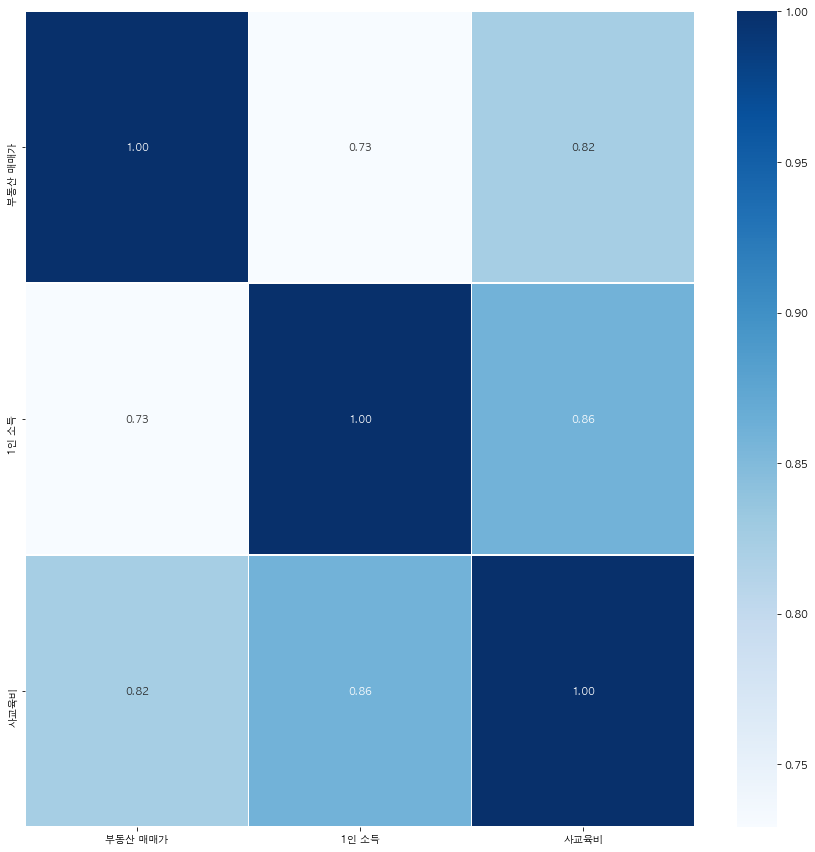

In [8]:
#피어슨 상관계수 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = final.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

>- r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
>- r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
>- r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
>- r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
>- r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
>- r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
>- r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

<AxesSubplot:>

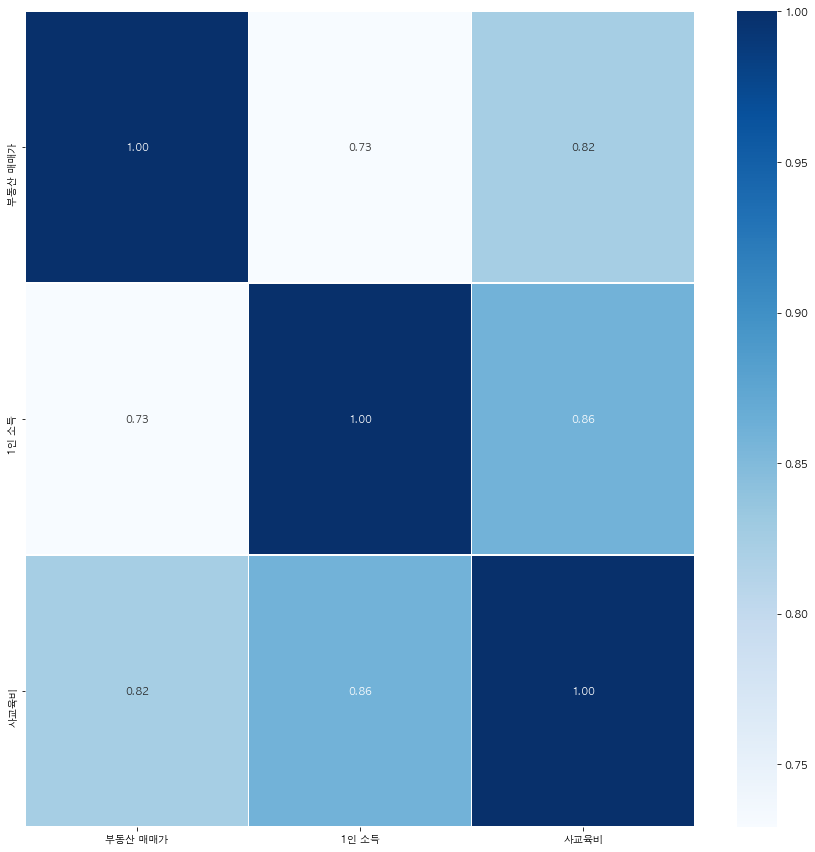

In [9]:
# 피어슨 상관계수 절대값으로 분석
plt.figure(figsize=(15,15))
sns.heatmap(data = abs(final.corr(method='pearson')), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')